# 1. Introduction to Dataset Exploration

In this section, we will:

Load the African Wildlife dataset.

Explore the dataset structure.

Visualize sample images with bounding boxes.

In [20]:
# Install matplotlib
%pip install matplotlib

# Import libraries
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset paths
train_image_dir = "data/african_wildlife/train/images"
train_label_dir = "data/african_wildlife/train/labels"


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\mophi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Function to visualize images with bounding boxes

In [22]:
# Function to visualize images with bounding boxes
def plot_image_with_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    height, width, _ = image.shape
    
    with open(label_path, "r") as file:
        for line in file:
            class_id, x_center, y_center, w, h = map(float, line.split())
            # Convert YOLO format to pixel coordinates
            x_center *= width
            y_center *= height
            w *= width
            h *= height
            x_min = int(x_center - w / 2)
            y_min = int(y_center - h / 2)
            x_max = int(x_center + w / 2)
            y_max = int(y_center + h / 2)
            
            # Draw bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    
    plt.imshow(image)
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.axis("off")
    plt.show()

### Visualize a few samples

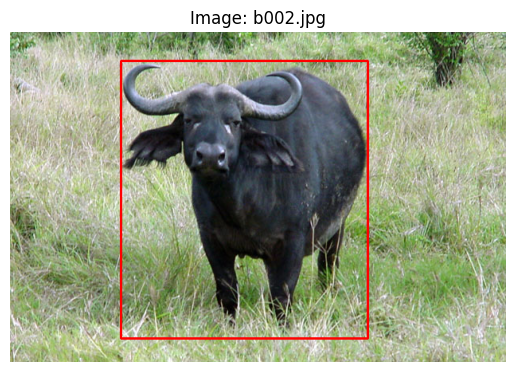

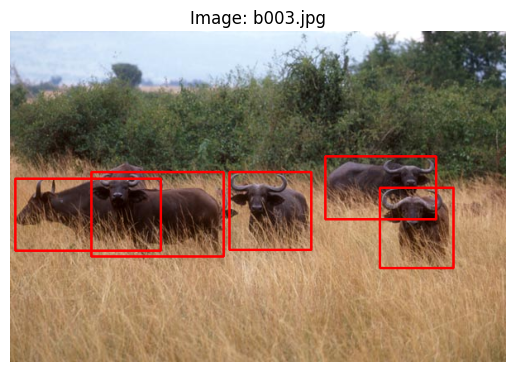

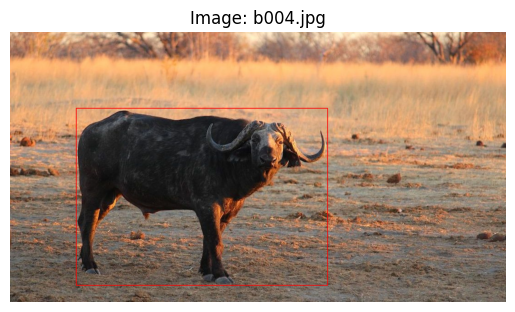

In [23]:
sample_images = os.listdir(train_image_dir)[:3]  # First 3 images
for img in sample_images:
    img_path = os.path.join(train_image_dir, img)
    label_path = os.path.join(train_label_dir, img.replace(".jpg", ".txt"))
    plot_image_with_boxes(img_path, label_path)

# 2. Dataset Verification

We need to ensure that:

Every image has a corresponding label file.

The annotations are correct.

In [24]:
# Verify dataset integrity
def verify_dataset(image_dir, label_dir):
    images = set(os.listdir(image_dir))
    labels = set(os.listdir(label_dir))
    
    missing_labels = []
    for img in images:
        label_file = img.replace(".jpg", ".txt")
        if label_file not in labels:
            missing_labels.append(img)
    
    if missing_labels:
        print(f"Missing labels for {len(missing_labels)} images.")
    else:
        print("All images have corresponding labels.")

verify_dataset(train_image_dir, train_label_dir)

All images have corresponding labels.


# 3. Dataset Preprocessing
In this section, we will:

Resize images to a consistent resolution (e.g., 640x640).

Normalize pixel values.

In [25]:
# Resize images and save to a new directory
def resize_images(image_dir, output_dir, size=(640, 640)):
    os.makedirs(output_dir, exist_ok=True)
    for img in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img)
        image = cv2.imread(img_path)
        resized_image = cv2.resize(image, size)
        cv2.imwrite(os.path.join(output_dir, img), resized_image)

# Resize training images
resize_images(train_image_dir, "data/african_wildlife/train/images_resized")

### train

In [28]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # Use 'yolov8s.pt' or 'yolov8m.pt' for larger models

# Train the model
results = model.train(data="data.yaml", epochs=50, imgsz=640, batch=16, name="african_wildlife_yolov8")

Ultralytics 8.3.83  Python-3.13.2 torch-2.6.0+cpu CPU (AMD Ryzen 5 5625U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=african_wildlife_yolov83, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:10<00:00, 72.9kB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning C:\Users\mophi\Desktop\wildlife-conservation-system\data\african_wildlife\train\labels... 1200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:01<00:00, 668.73it/s]

train: WARNING  C:\Users\mophi\Desktop\wildlife-conservation-system\data\african_wildlife\train\images\b054.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\mophi\Desktop\wildlife-conservation-system\data\african_wildlife\train\images\r033.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\mophi\Desktop\wildlife-conservation-system\data\african_wildlife\train\images\r037.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\mophi\Desktop\wildlife-conservation-system\data\african_wildlife\train\images\z315.jpg: corrupt JPEG restored and saved


train: New cache created: C:\Users\mophi\Desktop\wildlife-conservation-system\data\african_wildlife\train\labels.cache


val: Scanning C:\Users\mophi\Desktop\wildlife-conservation-system\data\african_wildlife\val\labels... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<00:00, 445.46it/s]

val: New cache created: C:\Users\mophi\Desktop\wildlife-conservation-system\data\african_wildlife\val\labels.cache


Plotting labels to runs\detect\african_wildlife_yolov83\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\african_wildlife_yolov83
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.8056      2.119      1.195         83        640: 100%|██████████| 75/75 [06:56<00:00,  5.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:31<00:00,  3.19s/it]

                   all        301        511      0.733      0.683      0.758      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.8996      1.453      1.239         60        640: 100%|██████████| 75/75 [06:50<00:00,  5.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.85s/it]

                   all        301        511      0.663      0.702      0.735      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.9756      1.417       1.27         69        640: 100%|██████████| 75/75 [07:22<00:00,  5.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.78s/it]

                   all        301        511      0.536      0.572        0.6      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.9589      1.314      1.262         64        640: 100%|██████████| 75/75 [07:18<00:00,  5.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.86s/it]

                   all        301        511      0.768      0.714      0.773      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.9389      1.225      1.256         70        640: 100%|██████████| 75/75 [06:48<00:00,  5.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.70s/it]

                   all        301        511      0.811      0.738      0.807      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      0.893      1.113      1.219         66        640: 100%|██████████| 75/75 [07:03<00:00,  5.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:30<00:00,  3.04s/it]

                   all        301        511      0.829      0.745      0.804      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.8857      1.062      1.219         70        640: 100%|██████████| 75/75 [07:05<00:00,  5.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.65s/it]

                   all        301        511      0.869      0.715      0.822      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.8876      1.013      1.214         99        640: 100%|██████████| 75/75 [06:58<00:00,  5.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.73s/it]

                   all        301        511      0.829      0.807      0.877      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.8678     0.9718       1.21         72        640: 100%|██████████| 75/75 [06:54<00:00,  5.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.74s/it]

                   all        301        511      0.863      0.823      0.905      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.8339     0.9198      1.173         59        640: 100%|██████████| 75/75 [07:07<00:00,  5.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:30<00:00,  3.09s/it]

                   all        301        511      0.848        0.8      0.877      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.8159     0.8584      1.178         53        640: 100%|██████████| 75/75 [07:01<00:00,  5.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.64s/it]

                   all        301        511      0.919      0.841      0.922      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.8221     0.8577      1.182         51        640: 100%|██████████| 75/75 [06:32<00:00,  5.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.67s/it]

                   all        301        511      0.921      0.778      0.897      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.7873     0.8111      1.161         55        640: 100%|██████████| 75/75 [06:31<00:00,  5.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.82s/it]

                   all        301        511      0.896      0.801      0.905      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.7935     0.8132      1.166         73        640: 100%|██████████| 75/75 [23:41<00:00, 18.96s/it]   
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:35<00:00,  3.51s/it]

                   all        301        511      0.818       0.76      0.846      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.7824     0.7919      1.151         58        640: 100%|██████████| 75/75 [08:16<00:00,  6.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:33<00:00,  3.36s/it]

                   all        301        511      0.914      0.837       0.92      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.7495     0.7569      1.132         59        640: 100%|██████████| 75/75 [08:26<00:00,  6.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:40<00:00,  4.04s/it]

                   all        301        511      0.857      0.844      0.913      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.7618     0.7675      1.142         82        640: 100%|██████████| 75/75 [08:38<00:00,  6.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.44s/it]

                   all        301        511       0.88      0.869      0.915      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      0.748     0.7382      1.133         72        640: 100%|██████████| 75/75 [08:14<00:00,  6.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.45s/it]

                   all        301        511      0.905      0.822       0.91      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.7372     0.7271      1.128         48        640: 100%|██████████| 75/75 [08:12<00:00,  6.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.45s/it]

                   all        301        511      0.888      0.881      0.931      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.7346     0.7141       1.13         48        640: 100%|██████████| 75/75 [08:10<00:00,  6.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.42s/it]

                   all        301        511       0.91      0.838      0.909      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.7179     0.6739      1.109         83        640: 100%|██████████| 75/75 [08:11<00:00,  6.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.44s/it]

                   all        301        511      0.927      0.846      0.928      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.6954     0.6739      1.102         52        640: 100%|██████████| 75/75 [08:10<00:00,  6.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.43s/it]

                   all        301        511      0.905      0.886       0.94      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.7131     0.6608      1.107         61        640: 100%|██████████| 75/75 [08:13<00:00,  6.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.42s/it]

                   all        301        511      0.938      0.884      0.945      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.6907     0.6416      1.104         60        640: 100%|██████████| 75/75 [08:10<00:00,  6.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.41s/it]

                   all        301        511       0.94      0.859      0.929      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.6781     0.6202      1.099         78        640: 100%|██████████| 75/75 [08:10<00:00,  6.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.41s/it]

                   all        301        511      0.917      0.865      0.934      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.6678     0.5959      1.073         66        640: 100%|██████████| 75/75 [08:12<00:00,  6.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:34<00:00,  3.42s/it]

                   all        301        511      0.961      0.876      0.941      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G       0.66     0.5995      1.083         58        640: 100%|██████████| 75/75 [08:09<00:00,  6.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:33<00:00,  3.38s/it]

                   all        301        511       0.94      0.851      0.934      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.6504     0.5746      1.072         75        640: 100%|██████████| 75/75 [08:09<00:00,  6.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:33<00:00,  3.39s/it]

                   all        301        511      0.938      0.848      0.935      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.6464     0.5777      1.073         79        640: 100%|██████████| 75/75 [2:22:48<00:00, 114.24s/it]    
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.65s/it]

                   all        301        511      0.944       0.89      0.946      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.6458     0.5529      1.068         52        640: 100%|██████████| 75/75 [06:46<00:00,  5.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.72s/it]

                   all        301        511      0.946      0.871      0.938      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.6437     0.5478      1.068         62        640: 100%|██████████| 75/75 [06:38<00:00,  5.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.67s/it]

                   all        301        511      0.933      0.893      0.946      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.6347      0.552      1.058         66        640: 100%|██████████| 75/75 [06:30<00:00,  5.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.65s/it]

                   all        301        511      0.927      0.883      0.947      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.6308     0.5554      1.059         73        640: 100%|██████████| 75/75 [06:39<00:00,  5.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.63s/it]

                   all        301        511       0.95      0.872      0.949      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.6229     0.5486      1.046         70        640: 100%|██████████| 75/75 [06:39<00:00,  5.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.63s/it]

                   all        301        511      0.896      0.866      0.935      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.6303     0.5333      1.058         65        640: 100%|██████████| 75/75 [06:45<00:00,  5.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.80s/it]

                   all        301        511      0.942       0.89      0.946      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G       0.61     0.5167       1.06         87        640: 100%|██████████| 75/75 [06:46<00:00,  5.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.94s/it]

                   all        301        511      0.936      0.911      0.955      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.6098     0.5043      1.043         67        640: 100%|██████████| 75/75 [06:36<00:00,  5.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.62s/it]

                   all        301        511      0.936      0.894      0.949      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.5892     0.5053      1.038         57        640: 100%|██████████| 75/75 [06:28<00:00,  5.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.75s/it]

                   all        301        511       0.95      0.894      0.955      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.5987     0.5047       1.04         77        640: 100%|██████████| 75/75 [06:24<00:00,  5.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.96s/it]

                   all        301        511      0.947      0.901      0.954      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.5992     0.4892      1.039         70        640: 100%|██████████| 75/75 [06:22<00:00,  5.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:25<00:00,  2.60s/it]

                   all        301        511      0.931      0.903       0.95      0.788


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.5031     0.3861       0.97         26        640: 100%|██████████| 75/75 [06:18<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:25<00:00,  2.58s/it]

                   all        301        511      0.959      0.885      0.949      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.4823     0.3633     0.9507         25        640: 100%|██████████| 75/75 [06:18<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:25<00:00,  2.56s/it]

                   all        301        511      0.951       0.89      0.943      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.4662     0.3499     0.9436         30        640: 100%|██████████| 75/75 [06:17<00:00,  5.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:25<00:00,  2.58s/it]

                   all        301        511      0.946      0.895      0.952      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.4549     0.3364     0.9295         31        640: 100%|██████████| 75/75 [08:22<00:00,  6.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.71s/it]

                   all        301        511      0.947      0.884       0.95      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.4623     0.3359     0.9351         30        640: 100%|██████████| 75/75 [06:33<00:00,  5.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.66s/it]

                   all        301        511      0.945      0.911       0.95      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.4532     0.3216     0.9308         23        640: 100%|██████████| 75/75 [06:30<00:00,  5.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:29<00:00,  2.91s/it]

                   all        301        511      0.955      0.904      0.955      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4439     0.3154      0.925         34        640: 100%|██████████| 75/75 [06:34<00:00,  5.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.69s/it]

                   all        301        511      0.951      0.894      0.952      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.4284     0.3097     0.9286         22        640: 100%|██████████| 75/75 [06:37<00:00,  5.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:27<00:00,  2.71s/it]

                   all        301        511      0.931      0.907      0.954        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.4277     0.2969     0.9112         22        640: 100%|██████████| 75/75 [06:29<00:00,  5.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:26<00:00,  2.69s/it]

                   all        301        511      0.929      0.913      0.955      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      0.424     0.2948     0.9036         27        640: 100%|██████████| 75/75 [06:30<00:00,  5.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:28<00:00,  2.90s/it]

                   all        301        511      0.942      0.898      0.954      0.802



50 epochs completed in 8.947 hours.
Optimizer stripped from runs\detect\african_wildlife_yolov83\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\african_wildlife_yolov83\weights\best.pt, 6.2MB

Validating runs\detect\african_wildlife_yolov83\weights\best.pt...
Ultralytics 8.3.83  Python-3.13.2 torch-2.6.0+cpu CPU (AMD Ryzen 5 5625U with Radeon Graphics)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:22<00:00,  2.29s/it]


                   all        301        511      0.955      0.904      0.956      0.807
               buffalo         84        123      0.974      0.911      0.939       0.81
              elephant         74        134      0.939      0.913      0.973      0.808
                 rhino         69        111      0.986       0.91      0.967      0.834
                 zebra         78        143      0.921      0.881      0.945      0.776
Speed: 1.6ms preprocess, 61.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\african_wildlife_yolov83


# 4. Model Training
In this section, we will:

Load the preprocessed dataset.

Train a YOLOv8 model on the African Wildlife dataset.

# 5. Model Evaluation
In this section, we will:

Evaluate the trained model on the validation set.

Compute key metrics like mAP, precision, and recall.

In [ ]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO("C:/Users/mophi/Desktop/wildlife-conservation-system/yolov8n.pt")
# Evaluate on the validation set
metrics = model.val()  # Use 'best_model.val()' if you loaded 'best.pt'

# Print key metrics
print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")
print(f"Precision: {metrics.box.precision}")
print(f"Recall: {metrics.box.recall}")

Ultralytics 8.3.83  Python-3.13.2 torch-2.6.0+cpu CPU (AMD Ryzen 5 5625U with Radeon Graphics)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco.yaml' images not found , missing path 'C:\Users\mophi\Downloads\ML based wildlife detection and conservation system\datasets\coco\val2017.txt'


# 6. Testing and Deployment
In this section, we will:

Test the model on new images.

Export the model for deployment.

In [ ]:
# Test on new images
test_images = ["path/to/test_image1.jpg", "path/to/test_image2.jpg"]  # Add your test images here

for img_path in test_images:
    best_model = YOLO("yolov8n.pt")
    results = best_model(img_path)
    for result in results:
        result.show()  
        print(f"Detected objects: {result.boxes.cls}")  

# Export the model to ONNX format
best_model.export(format="onnx")
print("Model exported to ONNX format for deployment.")